In [1]:
# Importing the Important Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Data PReprocessing Libraries
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Inmporting Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Importing the Dataset
df = pd.read_csv('train.csv')

In [5]:
# Displaying the first 10 rows of dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Preprocessing and Data Cleaning

In [6]:
# Since Passenger ID, Name and Ticket are irrelevant columns so we will drop them
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

In [7]:
# Storing all Columns Names in a list
col_names = list(df.columns)

In [8]:
# Checking for Null Values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Dropping Columns with High Amount of Missing Values
for col in col_names:
    if (df[col].isnull().sum() / df[col].shape[0]) > 0.3:
        df = df.drop(col, axis=1)

In [10]:
# Setting Up Encoding Strategy
enc = {
    'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2},
    'Sex' : {'male' : 0, 'female' : 1}
}

# Encoding the Categorical Values
df = df.replace(enc)

In [11]:
# Separating Features and Class
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values

In [12]:
# Checking for Null Values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
# Creating Instance of Imputer class to manage Missing Values
imputer_mode = Imputer(missing_values='NaN', strategy='most_frequent')
imputer_median = Imputer(missing_values='NaN', strategy='median')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# Fitting the Imputer and Managing Missing Values present in the Dataset
X[:, 6:] = imputer_mode.fit_transform(X[:, 6:])
X[:, 2:3] = imputer_median.fit_transform(X[:, 2:3])

In [15]:
# Splitting Dataset into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model Building and Training

In [16]:
# Listing all the Classifiers and their respective Accuracy Scores
classifiers = ['Decision Tree Classifier', 'K-Nearest Neighbor Classifier', 'Random Forest Classifier', 'Logistic Regression']
scores = list()

In [17]:
# Training with Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [18]:
# Training with K Nearest Neighbor Classifier
clf2 = KNeighborsClassifier(n_neighbors=9)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Training with Random Forest Classifier
clf3 = RandomForestClassifier(n_estimators=20)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Training with Logistic Regression
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

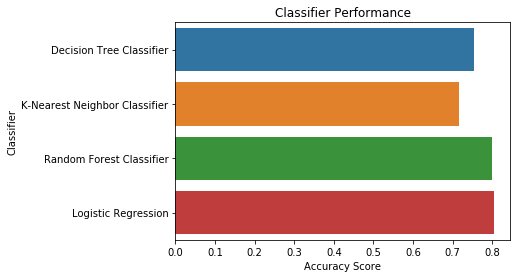

In [21]:
# Evaluating Performance of all the Classifiers
sns.barplot(x=scores, y=classifiers)
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Performance')
plt.show()

### As we can see that Logistic Regression has the best Accuracy Score, therefore we'll use it as the Final Model

In [22]:
# Checking on Sample Data
ds = [
    ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
    [1, 'male', 40, 2, 1, 363272, 'Q']
]

In [23]:
# Sample Set Preprocessing
ds = pd.DataFrame(ds[1:], columns=ds[0])
ds = ds.replace(enc)

In [24]:
'Yes' if clf4.predict(ds)[0] == 0 else 'No'

'No'